In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
#This note book use part of the code from: https://m-alcu.github.io/blog/2018/02/10/logit-pytorch/


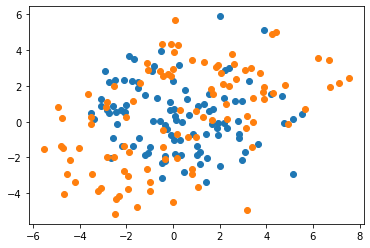

In [2]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import sys 

# create a random dataset
N = int (100)
D = int (2)

X = np.random.randn(N,D)*2
plt.scatter(X[:,0],X[:,1])

a=round(N/2)

# center the first N/2 points at (-2,-2)
X[:a,:] = X[:a,:] - 2*np.ones((a,D))
# center the last N/2 points at (2, 2)
X[a:,:] = X[a:,:] + 2*np.ones((a,D))

plt.scatter(X[:,0],X[:,1])


In [3]:
# labels: first N/2 are 0, last N/2 are 1
T = np.array([0]*(a) + [1]*(a)).reshape(100,1)

x_data = Variable(torch.Tensor(X))
y_data = Variable(torch.Tensor(T))
dataset=[[X],T]


In [4]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(2, 1) # 2 input and 1 output
        
    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred
    
# Our model    
model = Model()

criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
data_hist = [0]
epo_hist  = [0]
# Training loop
for epoch in range(1000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)
    i=round(epoch)
    # Compute and print loss
    loss = criterion(y_pred, y_data)
    #print(epoch, loss.data)
    #store loss file for plotting
    data_hist[i:] = [loss.data for i in range(1000)]
    epo_hist[i:] = [epoch for i in range(1000)]
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


/opt/conda/lib/python3.7/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))
/opt/conda/lib/python3.7/site-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


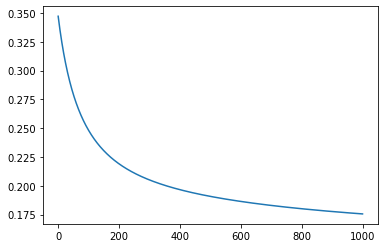

In [5]:
plt.plot(epo_hist,data_hist)

In [6]:
for f in model.parameters():
    print('data is')
    print(f.data)
    print(f.grad)

w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

data is
tensor([[0.8838, 0.8520]])
tensor([[-0.0148, -0.0092]])
data is
tensor([-0.0804])
tensor([0.0404])


Final gradient descend: [Parameter containing:
tensor([[0.8838, 0.8520]], requires_grad=True), Parameter containing:
tensor([-0.0804], requires_grad=True)]


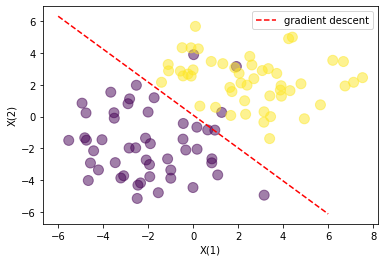

In [7]:
print ("Final gradient descend:", w)
# plot the data and separating line
plt.scatter(X[:,0], X[:,1], c=T.reshape(N), s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
line_up, = plt.plot(x_axis, y_axis,'r--', label='gradient descent')
plt.legend(handles=[line_up])
plt.xlabel('X(1)')
plt.ylabel('X(2)')
plt.show()